In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import os
import numpy as np
from PIL import Image
from tensorflow.keras import layers



In [2]:


def read_data(folder_path, label, img_size=(128, 128), color_mode='L'):
   
    class_images = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if os.path.isfile(img_path):
            # Open the image using PIL
            img = Image.open(img_path).convert(color_mode)  
            img = img.resize(img_size)  
            img_array = np.array(img)  
            img_array = img_array / 255.0 
            class_images.append(img_array)

    return class_images, [label] * len(class_images)


In [3]:
train_image_path = "images/"

X_train_images = []
y_train_labels = []

for folder, label in zip(["label1", "label2", "label3", "label4"], range(4)):
    folder_path = os.path.join(train_image_path, folder)
    images, labels = read_data(folder_path, label, color_mode='L')
    X_train_images.extend(images)
    y_train_labels.extend(labels)

X_train_images = np.array(X_train_images)
y_train_labels = to_categorical(y_train_labels)

In [4]:
#### for testing dataset
test_image_path = "test_images/"
X_test_images = []
y_test_labels = []

for folder, label in zip(["label1", "label2", "label3", "label4"], range(4)):
    folder_path = os.path.join(train_image_path, folder)
    images, labels = read_data(folder_path, label, color_mode='L')
    X_test_images.extend(images)
    y_test_labels.extend(labels)

X_test_images = np.array(X_train_images)
y_test_labels = to_categorical(y_test_labels)

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(4, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train_images, y_train_labels,
    validation_data=(X_test_images, y_test_labels),
    epochs=50,
    batch_size=32
)

C:\Users\sa018\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 49s 285ms/step - accuracy: 0.5727 - loss: 0.9339 - val_accuracy: 0.9735 - val_loss: 0.1100
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 44s 273ms/step - accuracy: 0.9362 - loss: 0.1957 - val_accuracy: 0.9937 - val_loss: 0.0223
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 43s 270ms/step - accuracy: 0.9764 - loss: 0.0747 - val_accuracy: 0.9812 - val_loss: 0.0519
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 43s 268ms/step - accuracy: 0.9807 - loss: 0.0602 - val_accuracy: 0.9955 - val_loss: 0.0159
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 181ms/step - accuracy: 0.9816 - loss: 0.0576 - val_accuracy: 0.9953 - val_loss: 0.0147
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.9827 - loss: 0.0420 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.9848 - loss: 0.0436 - val_accuracy: 1.0000 - val_loss: 7.6988e-04
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.9942 - los

160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


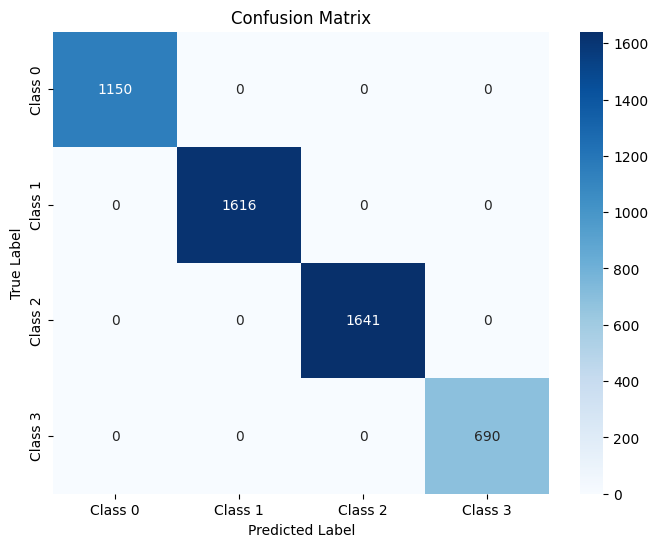

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1150
     Class 1       1.00      1.00      1.00      1616
     Class 2       1.00      1.00      1.00      1641
     Class 3       1.00      1.00      1.00       690

    accuracy                           1.00      5097
   macro avg       1.00      1.00      1.00      5097
weighted avg       1.00      1.00      1.00      5097



In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_images)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = np.argmax(y_test_labels, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print(report)


In [124]:
test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels)

print(f"Test Accuracy: {test_accuracy:.2f}")


160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 1.0000 - loss: 3.8352e-05
Test Accuracy: 1.00


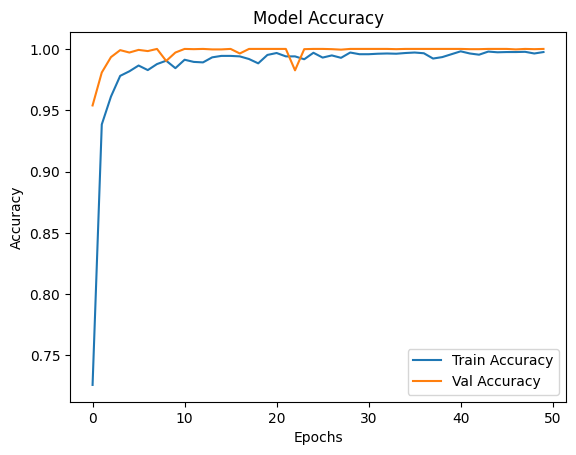

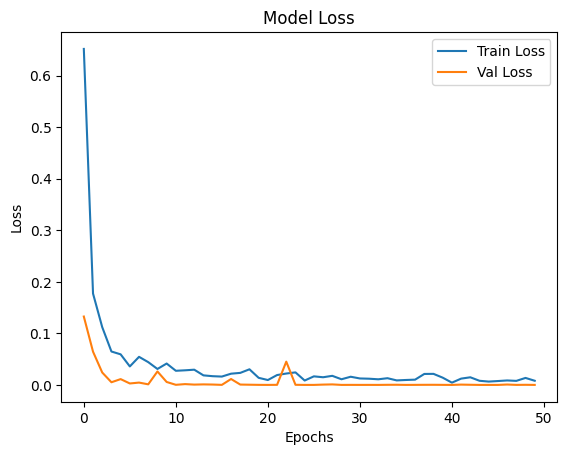

In [125]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [126]:
def predict_label(image_path, img_size=(128, 128)):
    img = image.load_img(image_path, target_size=img_size, color_mode='grayscale') 
    img_array = image.img_to_array(img)  
    img_array = img_array / 255.0  

    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    predicted_label = np.argmax(prediction, axis=1)

    return predicted_label[0] 



In [39]:
import pickle
with open('model_pickle.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved using pickle!")

Model saved using pickle!


In [127]:
image_path = "test_images/label1/1102.jpg" 
predicted_label = predict_label(image_path)
print(f"The predicted label is: {predicted_label + 1}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The predicted label is: 1


In [128]:
image_path = "test_images/label1/1140.jpg" 
predicted_label = predict_label(image_path)
print(f"The predicted label is: {predicted_label + 1}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted label is: 1


In [129]:
image_path = "test_images/label3/1094.jpg" 
predicted_label = predict_label(image_path)
print(f"The predicted label is: {predicted_label + 1}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted label is: 3


In [7]:
################# now the integer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical




In [8]:
file_paths1 = {
    1: "integer/0.csv", 
    2: "integer/1.csv",  
    3: "integer/2.csv",  
    4: "integer/3.csv"  
}

X2 = []
y2 = []

for label, file_path in file_paths1.items():
    data = pd.read_csv(file_path, header=None) 
    X2.append(data.values)  
    y2.extend([label] * len(data))

X2 = np.vstack(X2)  
y2 = np.array(y2)




In [9]:
first2 = pd.read_csv("integer/0.csv")
second2 = pd.read_csv("integer/1.csv")
third2 = pd.read_csv("integer/2.csv")
forth2 = pd.read_csv("integer/3.csv")

In [10]:
first2 = first2.iloc[:1273]
second2 = second2.iloc[:1273]
third2 = third2.iloc[:1273]
forth2 = forth2.iloc[:1273]

In [11]:
# taking testing value
test_var = first2.iloc[0]
test2 = test_var.to_numpy()
test2


array([ -47.,   -6.,   -5.,   -7.,   13.,   -1.,   35.,  -10.,   10.,
         -4.,    0.,    7.,  -31.,  -33.,  -48.,  -52.,   34.,   10.,
          5.,   -9.,   23.,   63.,   76.,   49.,  -27.,   -7.,   -7.,
         -3.,    0.,    4., -111.,   -2.,   -7.,    7.,   11.,   11.,
          2.,    2.,   76.,    3.,    7.,   -2.,    0.,   -6.,   21.,
         -3.,    0.,   -8.,  -40.,   -4.,   -1.,    6.,   -2.,   -2.,
       -105.,  -25.,   47.,    6.,    6.,    5.,   13.,   21.,  111.,
         15.,    0.])

In [12]:
# taking testing value
test_var2 = second2.iloc[0]
test3 = test_var2.to_numpy()
test3

array([ -6.,  -2.,  -5.,  -2.,  27.,  42.,   3.,   5.,  11.,   1.,  -1.,
        -1.,  -3.,   2.,  -1., -10., -35.,  -2.,   4.,   6., -16., -12.,
        -1.,   0.,  47.,   8.,   4.,  -2., -20., -23.,   0.,   8.,  -8.,
        -1.,  -2.,  -2.,  12.,  -1.,  -2.,  -6.,   3.,  -1.,   2.,  -3.,
        16.,  15.,  -5.,  -7.,  -2.,  -4.,  -3.,   0.,  -7.,  -7.,   1.,
         2., -17.,  -5.,  -7.,  -2.,  15.,  12.,   0.,  -7.,   1.])

In [13]:
# taking testing value
test_var3 = third2.iloc[0]
test4 = test_var3.to_numpy()
test4

array([ -1.,  12.,  20.,   7.,  20., -73.,  -4.,  -2.,   4.,   5., -14.,
        -4., -16., -12.,  -6.,   0.,  -2., -30.,  13.,  17.,  20.,  82.,
         0.,   6.,   7., -10.,  -4., -11., -41., -75., -20., -13., -13.,
        -2.,  -2.,  11.,  44.,  77.,  37.,   1.,   7.,  28.,  12.,   9.,
         5.,   0.,   8.,   7.,   8., -19., -13., -10.,  -5., -51., -19.,
        -3.,  -5.,  -2.,   0.,  -4.,  -7.,   5.,   6.,   9.,   2.])

In [14]:
# taking testing value
test_var4 = forth2.iloc[0]
test5 = test_var4.to_numpy()
test5

array([ -7.,   0.,   1.,   0., -13., -18.,   0.,  -9.,  -6.,  -2.,  -3.,
        -4.,   4., -12.,  -9.,  -4.,  16.,   0.,   1.,  -2.,  -4., -34.,
         0.,  -3.,  -5.,  -4.,  -3.,  -1., -12.,  -4.,  -8., -16.,  -4.,
         1.,   1.,   1.,   2., -16.,   8.,   7.,  -7.,  -6.,  -5.,   0.,
        37.,  32.,   2.,   4.,  -1.,   7.,   6.,   4., -34., -40.,   3.,
        -1.,  11.,  -4.,  -5.,  -4.,   3.,  -8.,  -7.,  -3.,   3.])

In [15]:
first2["result"] = first2["0"]

In [16]:
first2.columns = [str(i+1) for i in range(len(first2.columns)-1)] + ['Result']


In [17]:
second2.head()

,-7.0,-1.0,-1.0.1,0.0,-10.0,-10.0.1,-1.0.2,1.0,-5.0,-5.0.1,...,6.0.1,-4.0.6,-3.0.5,-5.0.5,-3.0.6,15.0.1,11.0,-4.0.7,-5.0.6,1
0,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
1,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
2,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
3,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1
4,-8.0,-3.0,-1.0,0.0,14.0,5.0,-4.0,-6.0,2.0,0.0,...,-18.0,53.0,8.0,-1.0,-1.0,-2.0,-5.0,-2.0,9.0,1


In [18]:
second2["result"] = second2["1"]
second2 = second2.drop(columns = ["1"])
second2.columns = [str(i+1) for i in range(len(second2.columns)-1)] + ['Result']

In [19]:
second2.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,Result
0,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
1,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
2,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
3,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1
4,-8.0,-3.0,-1.0,0.0,14.0,5.0,-4.0,-6.0,2.0,0.0,...,-18.0,53.0,8.0,-1.0,-1.0,-2.0,-5.0,-2.0,9.0,1


In [20]:
third2["result"] = third2["2"]
third2 = third2.drop(columns = ["2"])
third2.columns = [str(i+1) for i in range(len(third2.columns)-1)] + ['Result']

In [21]:
third2.shape

(1273, 65)

In [22]:
forth2["result"] = forth2["3"]
forth2 = forth2.drop(columns = ["3"])
forth2.columns = [str(i+1) for i in range(len(forth2.columns)-1)] + ['Result']

In [23]:
forth2.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,Result
0,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,...,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3
1,-6.0,-6.0,-6.0,-8.0,25.0,43.0,-4.0,7.0,6.0,1.0,...,3.0,2.0,1.0,3.0,-1.0,1.0,9.0,4.0,4.0,3
2,2.0,1.0,1.0,1.0,0.0,-23.0,2.0,-6.0,-1.0,-2.0,...,16.0,-3.0,-1.0,-1.0,-3.0,0.0,-3.0,4.0,3.0,3
3,0.0,3.0,4.0,5.0,1.0,25.0,-9.0,0.0,0.0,1.0,...,1.0,6.0,2.0,1.0,-3.0,-20.0,-42.0,-4.0,2.0,3
4,-11.0,-2.0,-5.0,1.0,-7.0,-11.0,-4.0,-23.0,-9.0,0.0,...,-4.0,9.0,1.0,2.0,8.0,21.0,41.0,15.0,9.0,3


In [24]:
combined4 = pd.concat([first2 , second2 , third2 , forth2], axis=0)

In [25]:
combined4.shape

(5092, 66)

In [26]:
new_combined = combined4.drop(combined4.columns[-2], axis=1)


In [27]:
new_combined.isnull().sum().sum()

np.int64(0)

In [28]:
new_combined.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,Result
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0


In [29]:
x1 = new_combined.iloc[:,0:-1]
y = new_combined.iloc[:,-1]

In [30]:
x1.shape

(5092, 64)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)



In [32]:
y.unique()

array([0, 1, 2, 3])

In [33]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y, num_classes=4)  # 4 classes (0, 1, 2, 3)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (4073, 64), Testing data shape: (1019, 64)


In [35]:
fnn_model = Sequential()
fnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Ensure input_dim is 64
fnn_model.add(Dense(128, activation='relu'))
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dense(4, activation='softmax'))

C:\Users\sa018\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
y_train.shape, y_test.shape

((4073, 4), (1019, 4))

In [37]:
fnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_fnn = fnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)



Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3547 - loss: 1.3087 - val_accuracy: 0.6487 - val_loss: 0.9240
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7302 - loss: 0.7640 - val_accuracy: 0.7713 - val_loss: 0.6095
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.4411 - val_accuracy: 0.8253 - val_loss: 0.4776
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9057 - loss: 0.2830 - val_accuracy: 0.8381 - val_loss: 0.4385
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9421 - loss: 0.1929 - val_accuracy: 0.8587 - val_loss: 0.4114
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9625 - loss: 0.1382 - val_accuracy: 0.8508 - val_loss: 0.4742
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9719 - loss: 0.1074 - val_accuracy: 0.8606 - val_loss: 0.4279
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9823 - loss: 0.0734 - val_accuracy: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


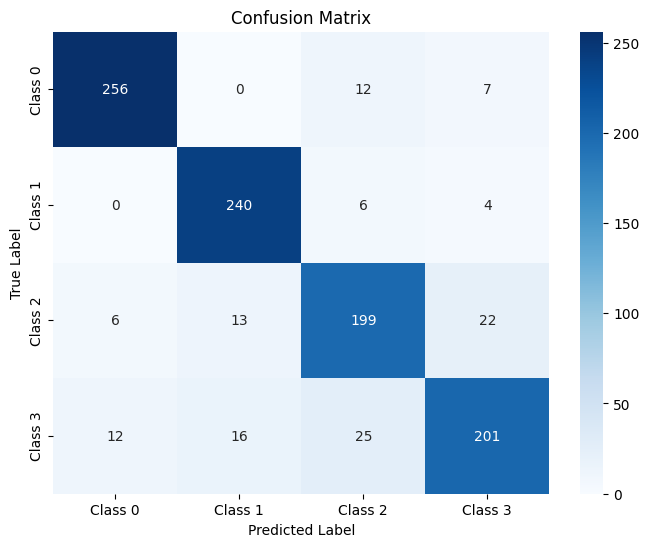

              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93       275
     Class 1       0.89      0.96      0.92       250
     Class 2       0.82      0.83      0.83       240
     Class 3       0.86      0.79      0.82       254

    accuracy                           0.88      1019
   macro avg       0.88      0.88      0.88      1019
weighted avg       0.88      0.88      0.88      1019



In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = fnn_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print(report)


In [235]:
test_loss_fnn, test_accuracy_fnn = fnn_model.evaluate(X_test, y_test)
print(f"FNN Test accuracy: {test_accuracy_fnn:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8905 - loss: 0.8640
FNN Test accuracy: 0.88


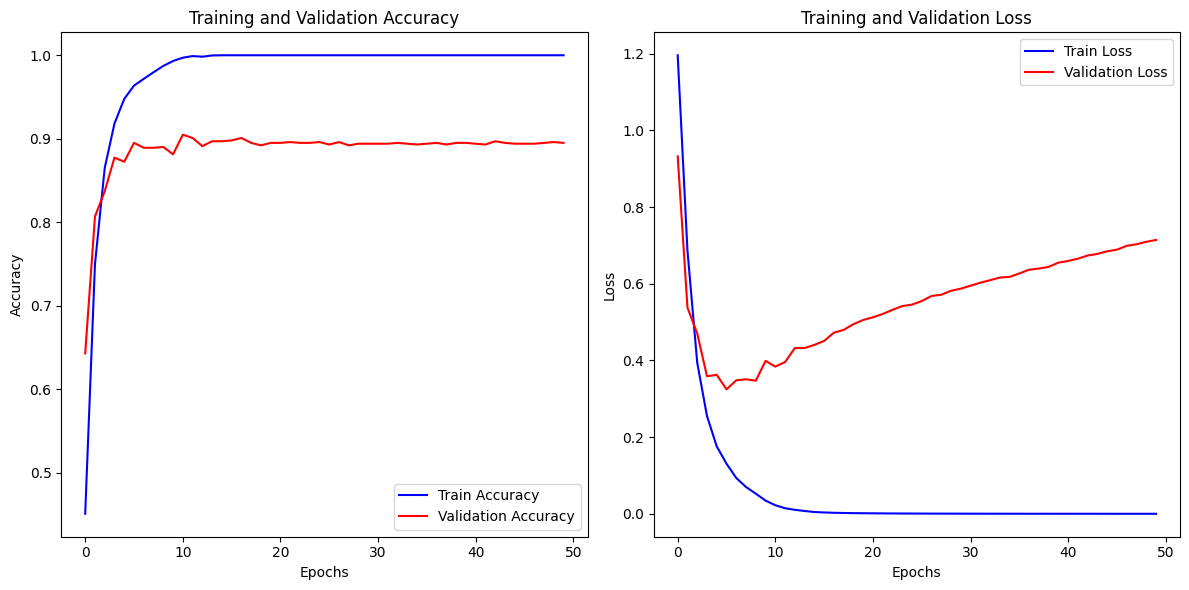

In [138]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'], label='Train Accuracy', color='b')
plt.plot(history_fnn.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'], label='Train Loss', color='b')
plt.plot(history_fnn.history['val_loss'], label='Validation Loss', color='r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import pickle

with open('model_pickle_integer.pkl', 'rb') as file:
    model1 = pickle.load(file)


In [10]:
import numpy as np


input_data = np.random.randint(1, 6, size=(1, 65))

prediction = model1.predict(input_data)

print("Prediction:", prediction)

predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: [[0.0000000e+00 0.0000000e+00 1.2638373e-25 1.0000000e+00]]
Predicted class: 3


In [39]:
X_train_images = X_train_images[:5092]
y_train_labels = y_train_labels[:5092]
X_test_images = X_test_images[:5092]
y_test_labels = y_test_labels[:5092]


In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

image_input = Input(shape=(128, 128, 1))  
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
image_output = Dense(4, activation='softmax')(x)

image_model = Model(inputs=image_input, outputs=image_output)


In [41]:
from tensorflow.keras.layers import Input, Dense

integer_input = Input(shape=(X_train.shape[1],)) 
y = Dense(64, activation='relu')(integer_input)
y = Dense(128, activation='relu')(y)
y = Dense(64, activation='relu')(y)
integer_output = Dense(4, activation='softmax')(y)

fnn_model = Model(inputs=integer_input, outputs=integer_output)


In [42]:
from tensorflow.keras.layers import Concatenate

combined_input = [image_input, integer_input]  
combined_output = Concatenate()([image_output, integer_output])  

combined_output = Dense(4, activation='softmax')(combined_output)

combined_model = Model(inputs=combined_input, outputs=combined_output)


In [43]:
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
X_test_images.shape , x1.shape , y_test_labels.shape

((5092, 128, 128), (5092, 64), (5092, 4))

In [45]:
history_combined = combined_model.fit(
    [X_train_images, x1],  
    y_train_labels,  
    validation_data=([X_test_images, x1], y_test_labels),  # Validation data
    epochs=50,
    batch_size=32
)


Epoch 1/50


C:\Users\sa018\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_67', 'keras_tensor_78']. Received: the structure of inputs=('*', '*')
  warnings.warn(


159/160 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3845 - loss: 1.2881

C:\Users\sa018\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_67', 'keras_tensor_78']. Received: the structure of inputs=('*', '*')
  warnings.warn(


160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - accuracy: 0.3854 - loss: 1.2872 - val_accuracy: 0.5462 - val_loss: 1.0827
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.5613 - loss: 1.0484 - val_accuracy: 0.5789 - val_loss: 0.9452
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.5771 - loss: 0.9399 - val_accuracy: 0.6004 - val_loss: 0.8401
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.6284 - loss: 0.8364 - val_accuracy: 0.7353 - val_loss: 0.7457
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.7117 - loss: 0.7645 - val_accuracy: 0.7828 - val_loss: 0.6716
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.7651 - loss: 0.6739 - val_accuracy: 0.7797 - val_loss: 0.6487
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.7909 - loss: 0.6252 - val_accuracy: 0.8476 - val_loss: 0.5237
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.8409 - loss: 0.5348 - val

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  classification_report

report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print(report)


              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93       275
     Class 1       0.89      0.96      0.92       250
     Class 2       0.82      0.83      0.83       240
     Class 3       0.86      0.79      0.82       254

    accuracy                           0.88      1019
   macro avg       0.88      0.88      0.88      1019
weighted avg       0.88      0.88      0.88      1019



In [240]:
test_loss_fnn, test_accuracy_fnn = combined_model.evaluate(X_test, y_test)
print(f"FNN Test accuracy: {test_accuracy_fnn:.2f}")


In [102]:
test_loss, test_accuracy = model2.evaluate(
    [X_test_images, x1], 
    y_test_labels,
    batch_size=32  
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


C:\Users\sa018\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_25', 'input_layer_26']. Received: the structure of inputs=('*', '*')
  warnings.warn(


160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
Test Loss: 0.023840075358748436
Test Accuracy: 0.9974469542503357


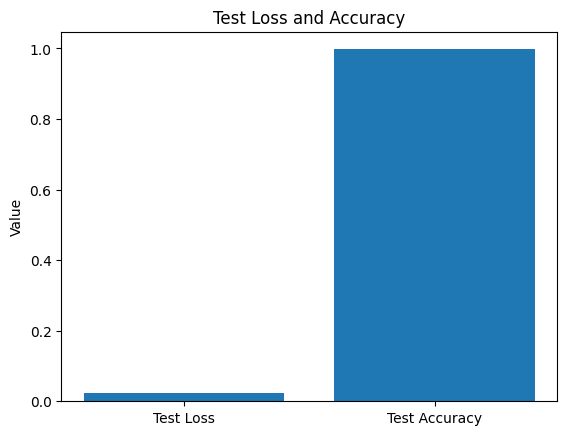

In [103]:
fig, ax = plt.subplots()

labels = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

ax.bar(labels, values)

ax.set_title("Test Loss and Accuracy")
ax.set_ylabel("Value")

plt.show()

160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184


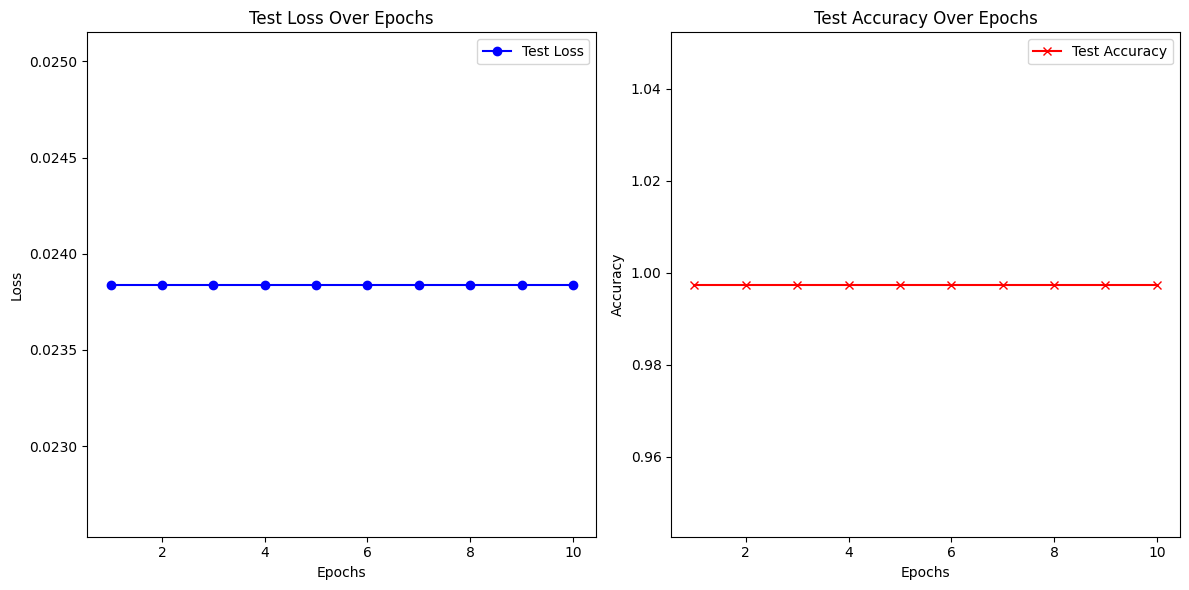

In [105]:
import matplotlib.pyplot as plt

test_losses = []
test_accuracies = []

num_epochs = 10  

for epoch in range(1, num_epochs + 1):
    test_loss, test_accuracy = model2.evaluate([X_test_images, x1], y_test_labels, batch_size=32)
    
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='b', marker='o')
plt.title("Test Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='r', marker='x')
plt.title("Test Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9978 - loss: 0.0184
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9978 - loss: 0.0184


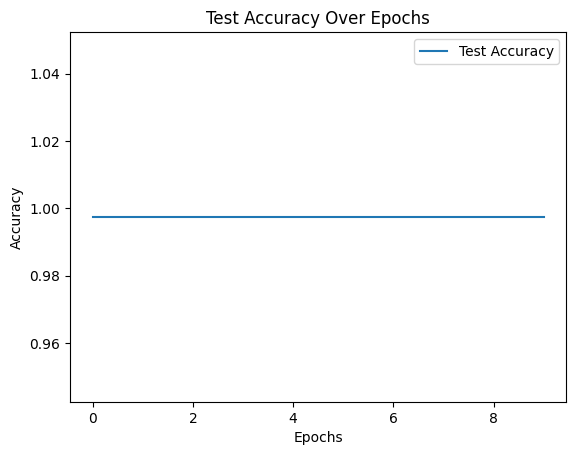

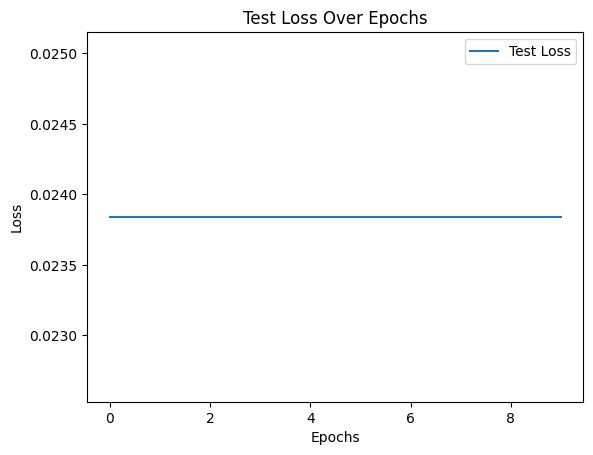

In [106]:
import matplotlib.pyplot as plt

test_losses = []
test_accuracies = []

num_epochs = 10 

for epoch in range(1, num_epochs + 1):
    test_loss, test_accuracy = model2.evaluate([X_test_images, x1], y_test_labels, batch_size=32)
    
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

# Plot Test Accuracy
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Test Loss
plt.plot(test_losses, label='Test Loss')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [267]:
combined_model.save('combined_model.h5')


In [35]:
model2 = tf.keras.models.load_model('combined_model.h5')


In [8]:
import numpy as np

index = 0 
single_image = X_test_images[index:index+1]  

single_integer = np.random.randint(1, 6, size=(1, 64)) 

prediction = model2.predict([single_image, single_integer])

predicted_class = np.argmax(prediction, axis=1)

print(f"The predicted class for the given image and integer data is: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
The predicted class for the given image and integer data is: 2


C:\Users\sa018\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_25', 'input_layer_26']. Received: the structure of inputs=('*', '*')
  warnings.warn(


In [27]:
reshaped_test2 = test2.reshape(1, 65)
reshaped_test2.shape

(1, 65)

In [32]:
import numpy as np

index = 5
single_image = X_test_images[index:index+1]  

single_integer = test2[:64] 
single_integer = single_integer.reshape(1, 64)

prediction = model2.predict([single_image, single_integer])

predicted_class = np.argmax(prediction, axis=1)

print(f"The predicted class for the given image and integer data is: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The predicted class for the given image and integer data is: 0


C:\Users\sa018\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_25', 'input_layer_26']. Received: the structure of inputs=('*', '*')
  warnings.warn(


In [35]:
import numpy as np

index = 2000
single_image = X_test_images[index:index+1]  

single_integer = test3[:64] 
single_integer = single_integer.reshape(1, 64)

prediction = model2.predict([single_image, single_integer])

predicted_class = np.argmax(prediction, axis=1)

print(f"The predicted class for the given image and integer data is: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted class for the given image and integer data is: 1


In [37]:

import numpy as np

index = 3000
single_image = X_test_images[index:index+1]  

single_integer = test4[:64] 
single_integer = single_integer.reshape(1, 64)

prediction = model2.predict([single_image, single_integer])

predicted_class = np.argmax(prediction, axis=1)

print(f"The predicted class for the given image and integer data is: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted class for the given image and integer data is: 2


In [42]:
import numpy as np

index = 5000
single_image = X_test_images[index:index+1]  

single_integer = test5[:64] 
single_integer = single_integer.reshape(1, 64)

prediction = model2.predict([single_image, single_integer])

predicted_class = np.argmax(prediction, axis=1)

print(f"The predicted class for the given image and integer data is: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted class for the given image and integer data is: 3


In [ ]:

import numpy as np

index = 3000
single_image = X_test_images[index:index+1]  

single_integer = np.random.randint(1, 6, size=(1, 64)) 

prediction = model2.predict([single_image, single_integer])

predicted_class = np.argmax(prediction, axis=1)

print(f"The predicted class for the given image and integer data is: {predicted_class[0]}")


In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_test_classes = np.argmax(y_test_labels, axis=1)  # Convert one-hot encoded labels to class indices

y_pred = model2.predict([X_test_images, x1])

y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)


160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step
Confusion Matrix:
[[1147    1    2    0]
 [   0 1616    0    0]
 [   0    0 1633    8]
 [   1    1    0  683]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step
Confusion Matrix:
[[1147    1    2    0]
 [   0 1616    0    0]
 [   0    0 1633    8]
 [   1    1    0  683]]


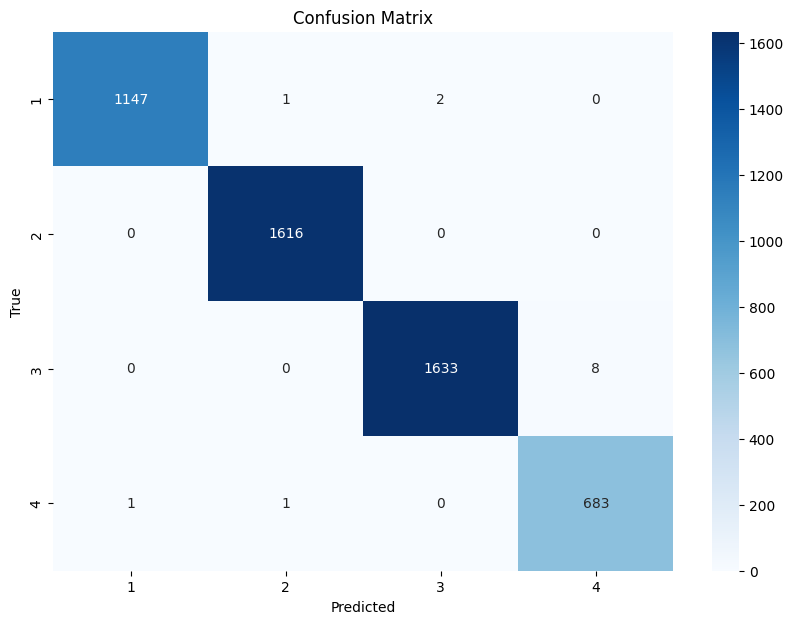

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_test_classes = np.argmax(y_test_labels, axis=1) 

y_pred = model2.predict([X_test_images, x1])

y_pred_classes = np.argmax(y_pred, axis=1)  

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))  
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['1','2','3','4'], yticklabels=['1','2','3','4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


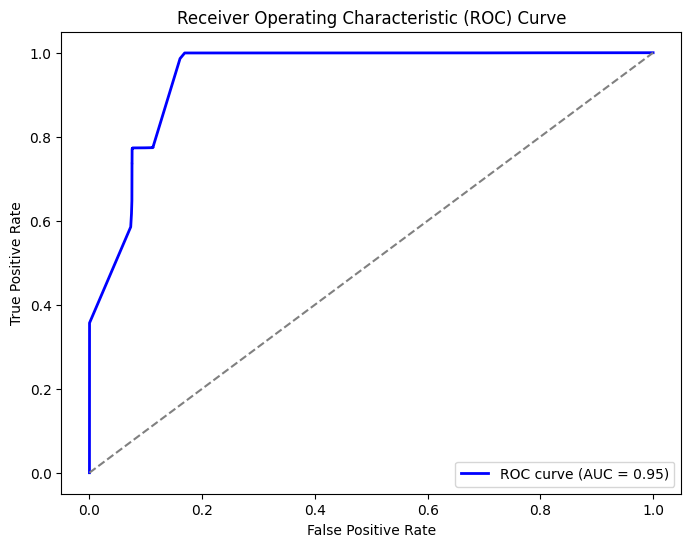

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true_classes, classes=[0, 1, 2, 3])

y_pred_prob = model2.predict([X_test_images, random_integers_repeated])

fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


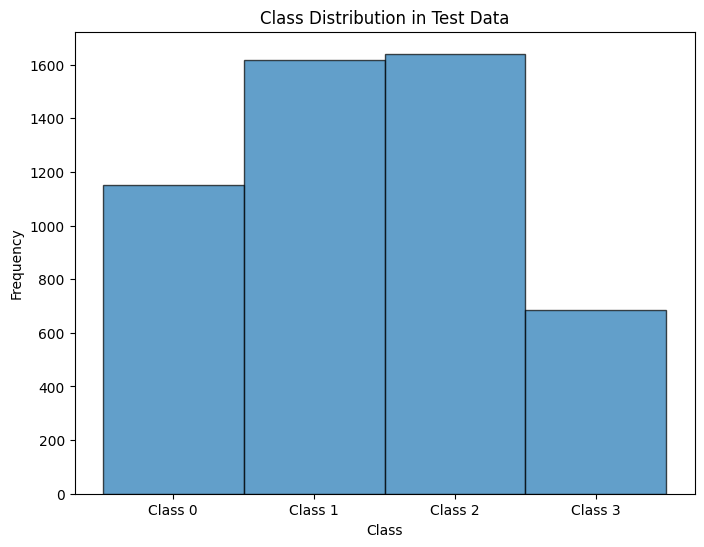

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(y_true_classes, bins=np.arange(5) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks([0, 1, 2, 3], ['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Class Distribution in Test Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
